<a href="https://colab.research.google.com/github/genetbogale/DSA_NEW/blob/main/11_14_2_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 11.14.2

Neural networks are particularly useful for image recognition.  The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) contains images of 70,000 articles of clothing in grayscale.  They can be classified in 10 categories: 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'.

In this activity, you will use the Python Keras library to build a neural network that learns to classify the images of clothing.   

##Step 1: Install the necessary packages
**Note**: Keras runs on top of the larger TensorFlow machine learning package in Python.

```
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
```

In [6]:
#Step 1

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



##Step 2: Import the Fashion MNIST data
* Run the following code block to load the data.
* `train_images` and `train_labels` contain the images and labels for 60,000 of the images to be used for training the neural network.
* `test_images` and `test_labels` contain the images and labels for 10,000 images and labels reserved for testing the neural network.

In [7]:
#Step 2

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


##Step 3: Create a list of the class names
* The neural network (like other machine learning algorithms we have worked with) needs the class labels to be represented as numbers rather than strings.  However, it will be helpful for us to have a list of the actual item labels as well.  
* Create a list called `class_names` containing the items: 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' (in that order).

In [8]:
#Step 3

class_names=('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
'Sneaker', 'Bag', 'Ankle boot')


##Step 4: View an image in the training data
* Every pixel of each image contains a value from 0 (indicating the pixel is completely black) to 1 (indicating the pixel is completely white).  
* Run the code block below to visualize the first image in the dataset.
* What article of clothing is it?

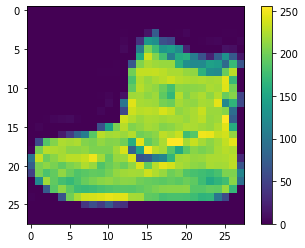

In [9]:
#Step 4:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

###Answer:




##Step 5: View other images
* Copy and modify the code in Step 4 to visualize other items of clothing.
* To do this, you need to change the value in the index of `train_images` to a larger number.

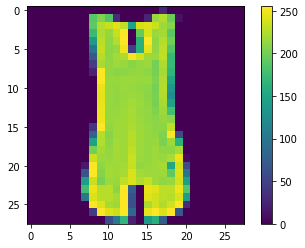

In [11]:
#Step 5 - For example viewing the 4th image in the set.
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(False)
plt.show()

##Step 6: Scale the image data
* As with other ML algorithms we have worked with, it is important to scale the data before modeling.
* You need to scale the data, so every pixel has a value between 0 and 1 (rather than 0 to 255).  You can do this by dividing `train_images` and `test_images` by 255.0.
* Do this calculation and rename the results `train_images` and `test_images`, respectively.

In [12]:
#Step 6
train_images= train_images/255

test_images = test_images/255


##Step 7: Visualize multiple images from the data in grayscale
* Run the following code block to visualize a number of different items of clothing with their labels.
* What items seem most challenging to differentiate (i.e., look the most similar)?

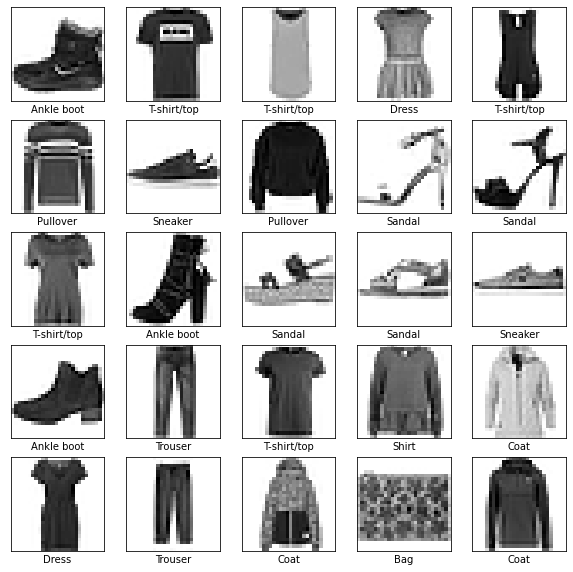

In [13]:
#Step 7

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

###Answer:



##Step 8: Specify the neural network
* Run the following code block to build the neural network.
* For this neural network, we are going to specify a `Sequential` model with three layers: the input layer, a hidden layer, and the output layer.
* Note that the input shape is 28 x 28, which is the size of each image, and the output layer has 10 neurons, one for each type of clothing in the dataset.

In [14]:
#Step 8

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

##Step 9: Compile the neural network
Run the following code to compile the neural network. 

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

##Step 10: Fit the model to the data
Run the following code to fit the model to the training data.  *(Note: This will take a little while!)*

In [24]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1397 - accuracy: 0.9468
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1357 - accuracy: 0.9497
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1342 - accuracy: 0.9489
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1292 - accuracy: 0.9510
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1303 - accuracy: 0.9512
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1273 - accuracy: 0.9523
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1254 - accuracy: 0.9524
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1229 - accuracy: 0.9540
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1206 - accuracy: 0.9546
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.118

##Step 11: Calculate the model accuracy on the training data 
* Calculate the accuracy using the following:

```
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)
```

* And print `train_acc`



In [25]:
#Step 11

train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)
train_acc

1875/1875 - 2s - loss: 0.1096 - accuracy: 0.9595 - 2s/epoch - 1ms/step


0.9595166444778442

##Step 12: Calculate the model accuracy using the testing data 
Modify your code in Step 11 to replace `train` with `test`.



In [26]:
#Step 12

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
test_acc

313/313 - 0s - loss: 0.4544 - accuracy: 0.8848 - 438ms/epoch - 1ms/step


0.8848000168800354

##Step 13: Visualize predictions 
* Run the following code block, which will plot 15 images along with their predicted labels.
* Which item was labeled incorrectly?  What is it really?



313/313 [==============================] - 1s 2ms/step


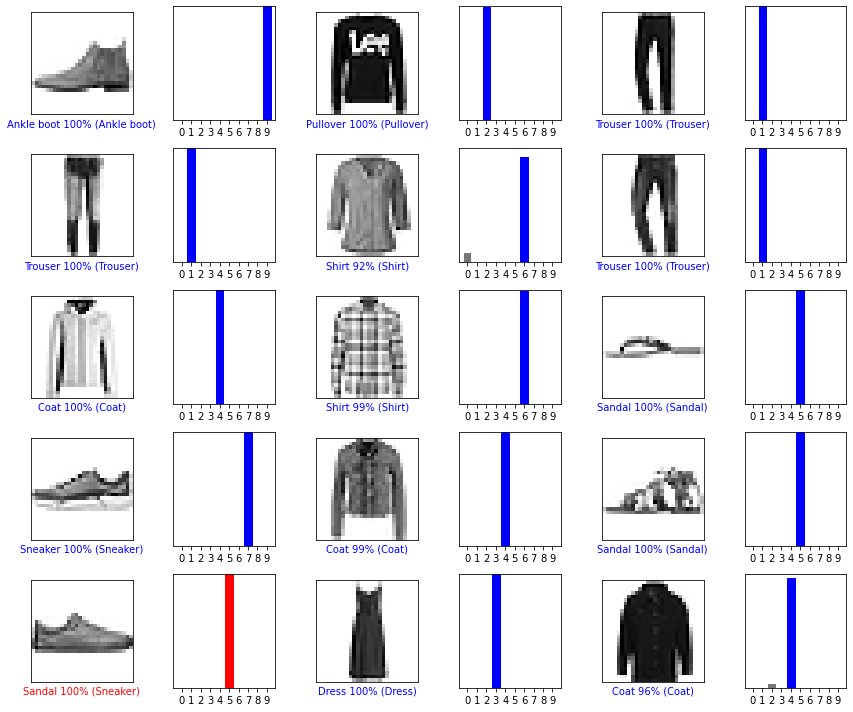

In [27]:
#Step 13

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)


def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

###Answer:

